# 개발주제 : 길이에 따른 너비


In [24]:
# [1-1] 모듈 로딩 - 데이터 분석용

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split


In [25]:
file = '../Data/iris.csv'
iris_df = pd.read_csv(file)

In [26]:
iris_df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [27]:
iris_df = iris_df[['petal.length','petal.width']]

In [28]:
iris_df

,petal.length,petal.width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


# 길이 와 넓이 시각화

Text(0, 0.5, 'Weight')

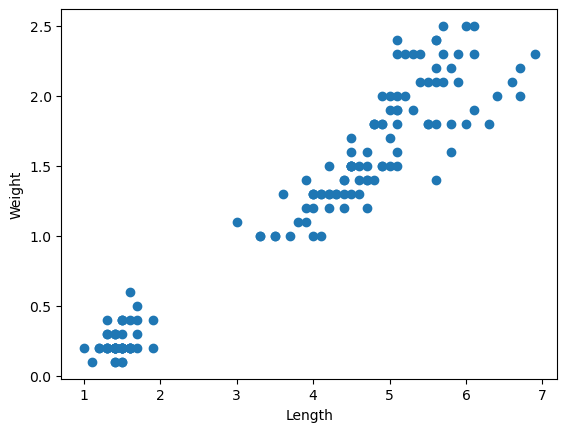

In [29]:
plt.plot(iris_df['petal.length'],iris_df['petal.width'], 'o')
plt.xlabel('Length')
plt.ylabel('Weight')

In [30]:
# 데이터셋 준비 => 학습용, 검증용, 테스트용 
# 학습용 => length 
# 타겟 => width

# 독립변수
featureDF = iris_df[['petal.length']]
# 종속변수
targetSR = iris_df['petal.width']

print(f'featureDF => {featureDF.ndim}D targetSR => {targetSR.ndim}D')


featureDF => 2D targetSR => 1D


In [31]:
# 학습용 : 테스트용 => 80:20
X_train, X_test, y_train, y_test = train_test_split(featureDF,targetSR,test_size=0.2, random_state=10)


print(f'X_train => {X_train.shape},  X_test => {X_test.shape}')
print(f'y_train => {y_train.shape},  y_test => {y_test.shape}')


X_train => (120, 1),  X_test => (30, 1)
y_train => (120,),  y_test => (30,)


In [32]:
# 학습용 : 검증용 => 80:20
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,\
													test_size=0.2,\
													random_state=10)


print(f'X_train => {X_train.shape}, X_val => {X_val.shape} ,X_test => {X_test.shape}')
print(f'y_train => {y_train.shape}, y_val => {y_val.shape}, y_test => {y_test.shape}')

X_train => (96, 1), X_val => (24, 1) ,X_test => (30, 1)
y_train => (96,), y_val => (24,), y_test => (30,)


In [33]:
# [3-2] 학습 진행 => 알고리즘 객체 생성
iris_Model = LinearRegression()

In [34]:
# [3-3] 학습진행 => 학승용 데이터셋 사용
iris_Model.fit(X_train,y_train)

LinearRegression()

In [35]:
# => 모델 파라미터 확인
print(f'iris_Model.coef_ {iris_Model.coef_},iris_Model.intercept_ {iris_Model.intercept_}')

iris_Model.coef_ [0.41444506],iris_Model.intercept_ -0.34386691395954627


# [4] 학습평가

In [36]:
# [4-1] 성능 평가 : 모델 적합도 => 검증용 데이터 셋
score = iris_Model.score(X_val,y_val)

print(f'모델 성능 평가 {score}')

모델 성능 평가 0.9287817744201953


In [37]:
# [4-2] 손실계산 : 검증용 데이터셋으로 예측값 추출 ==> 손실계산
pre_y = iris_Model.predict(X_val)


mse = mean_squared_error(y_val, pre_y)
mae = mean_absolute_error(y_val, pre_y)

print(f'mean_squared_error : {mse}, mean_absolute_error : {mae}')

mean_squared_error : 0.04308208076567218, mean_absolute_error : 0.16018387698378037


In [38]:
x = float(input('길이를 입력해주세요 :'))

#print(type(X_test))
pre_y = iris_Model.predict([[x]])

print(f'길이 {x} 에 대한 예측너비 : {pre_y[0]:.2f}')

ValueError: could not convert string to float: '1-'